# 0. Make all imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# 1. Analyzing train.csv file

## 1.1. Data Understanding
- Data shape
- Head and tail
- Dtypes
- Columns
- Describe

In [77]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [78]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [79]:
train.shape

(8693, 14)

In [80]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [81]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## 1.2. Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicate columns
- Renaming columns
- Feature creation
- Identifying missing values --> df.isna().sum()

Notes: it is a good practice to:
- Change to datetime the columns that are actually dates --> pd.to_datetime(df)
- Change to numeric the columns that are actually numbers --> pd.to_numeric(df)
- Rename some column names in order to standardize the names --> df.rename({'old_name': 'new_name'})

In [82]:
null_values = train.isna().sum() / len(train)
null_values

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [83]:
# As the null value percentage is low (approx. 2%), we can proceed on droping null values
train = train.dropna(axis=0)
train.shape

(6606, 14)

A good idea would have been to check how many rows we might loose, but in this case, we can check the null again

In [84]:
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [85]:
train.duplicated()[:10]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
8     False
9     False
11    False
dtype: bool

In [86]:
train.loc[train.duplicated(subset=['PassengerId'])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


Duplicated: I'm going to considerate that there is no duplicated values in the train dataset.

In [87]:
train.query('PassengerId == "9278_01"') # It is possible to query a value to check it where it is

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


Note: a good source to understand more about EDA could be https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

## 1.3. Feature Understanding
- Plotting Feature Distribution
    - Histogram
    - KDE
    - Boxplot

In [88]:
# Is the data frame balanced? Check the target value counts
train['Transported'].value_counts() # --> the target is balanced

True     3327
False    3279
Name: Transported, dtype: int64

In [89]:
train['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [90]:
train['VIP'].value_counts()

False    6444
True      162
Name: VIP, dtype: int64

In [91]:
train['VIP'] = train['VIP'].astype(bool)
train['VIP'] = train['VIP'].astype(int)
train['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 6606, dtype: int32

In [92]:
train['CryoSleep'] = train['CryoSleep'].astype(bool).astype(int)

In [93]:
train['Cabin'].value_counts()

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: Cabin, Length: 5305, dtype: int64

Note: for column "Cabin", I'm going to take it out but after, obviously there's going to be a split for analaysis

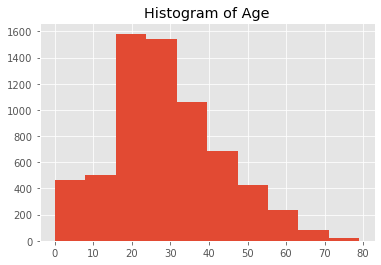

In [94]:
plt.hist(x=train.Age)
plt.title('Histogram of Age')
plt.show()

In [95]:
# We need to convert the booleans from Transported column into numerical values
train['Transported'] = train['Transported'].astype(int)

## 2. Machine Learning Algorithms

### 2.1. Logistic Regression

First, I'm going to start to split the train data set into a train/test split, in order to check the auc_roc and proba.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.compose import make_column_transformer

In [97]:
train['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [98]:
cat_features = ['HomePlanet', 'Destination']

In [99]:
# It is necessary to change categorical features into numerical features in order to set the algo properly
# LabelEncoder
le = preprocessing.LabelEncoder()
for cat in cat_features:
    train[cat] = le.fit_transform(train[cat])
    print(le.classes_)

['Earth' 'Europa' 'Mars']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']


In [100]:
train = train.drop(['PassengerId','Cabin', 'Name'], axis=1)
train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [101]:
X = train.drop('Transported', axis=1)
y = train['Transported']

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### This is the classifier model: clf

In [103]:
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [104]:
predictions = clf.predict(X_val)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.7866868381240545

# Prepare test dataset

In [106]:
test = pd.read_csv('test.csv')
test = test.fillna()
test_ids = test['PassengerId']

In [107]:
len(test_ids)

3281

In [108]:
def clean(df: pd.DataFrame):
    df = df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
    cats = ['HomePlanet', 'Destination']
    to_num = ['CryoSleep', 'VIP']
    for cat in cats:
        df[cat] = le.fit_transform(df[cat])
        print(le.classes_)
    for col in to_num:
        df[col] = df[col].astype(bool).astype(int)
    return df

In [109]:
test = clean(test)
test.head(5)

['Earth' 'Europa' 'Mars']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [110]:
submission = clf.predict(test)

In [113]:
df = pd.DataFrame({'PassengerId': test_ids.values,
                    'Transported': submission,})
df['Transported'] = df['Transported'].astype(bool)
df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [114]:
df.to_csv('PabloSegovia_SpaceshipTitanic.csv', index=False)